Data Set-up
---
In this lab we’re going to be looking at avocado prices.

The data set comes to us from Kaggle and represents weekly retail scan data. A description of the data can be found here:

https://www.kaggle.com/datasets/timmate/avocado-prices-2020

### 0. Import the data and declare your package dependencies.

In [528]:
# Package Dependencies
import pandas as pd
from plotnine import *
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings

# Suppress warnings globally
warnings.filterwarnings('ignore')

In [529]:
# Importing the Data
avocados = pd.read_csv('Data/avocado-updated-2020.csv')
avocados['geography'].value_counts()

geography
Albany                  612
Atlanta                 612
Baltimore/Washington    612
Boise                   612
Boston                  612
Buffalo/Rochester       612
California              612
Charlotte               612
Chicago                 612
Cincinnati/Dayton       612
Columbus                612
Dallas/Ft. Worth        612
Denver                  612
Detroit                 612
Grand Rapids            612
Great Lakes             612
Harrisburg/Scranton     612
Hartford/Springfield    612
Houston                 612
Indianapolis            612
Jacksonville            612
Las Vegas               612
Los Angeles             612
Louisville              612
Miami/Ft. Lauderdale    612
Midsouth                612
Nashville               612
New Orleans/Mobile      612
New York                612
Northeast               612
Northern New England    612
Orlando                 612
Philadelphia            612
Phoenix/Tucson          612
Pittsburgh              612
Plains    

In [530]:
avocados.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington



### 1. Briefly describe the data set. What information does it contain?

 Overall, this dataset captures information related to avocado sales, including pricing, sales volume, product type, and regional differences.

- date: The date of the sales data entry.
- average_price: The average price of avocados on the given date.
- total_volume: The total number of avocados sold.
- 4046, 4225, 4770: Total number of avocados sold; Different PLU codes representing different avocado sizes or types.
- total_bags, small_bags, large_bags, xlarge_bags: The total number of bags sold, and a breakdown by bag size (small, large, extra large).
- type: The type of avocado (either conventional or organic).
- year: The year the data was recorded.
- geography: The geographical region or market (e.g., Albany, Atlanta, Baltimore/Washington, West Tex/ New Mexico).


### 2. Clean the data in any way you see fit.


"In particular, look carefully at the geography variable. Notice that the category "Los Angeles" is contained in "California", which is contained in "West", which is contained in "Total U.S.". Think about how you want to handle this issue in your analysis.

How many distinct geographical regions are there? Can you categorize them into different types of geographical regions (e.g. major regions, metro regions, etc.)? Will you create a new variable for this? A new data set for each?

You may also want to consider renaming variables so they make sense intuitively. For example, what does 4046 mean in terms of the size of avocados?"


In [531]:
# Define regions and states lists
region_list = ["Midsouth", "Northeast", "Southeast", "West", "Plains", "Great Lakes", "South Central"]
state_list = region_list + ["Total U.S.", "California", "South Carolina", "Northern New England", "New York", "West Tex/New Mexico"]

# Step 1: Melt the dataset to create a tidy structure with PLU and total_sold variables
avocado_long = pd.melt(avocados, 
                       id_vars=['date', 'average_price', 'total_volume', 'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year', 'geography'],
                       value_vars=['4046', '4225', '4770'],
                       var_name='plu',
                       value_name='total_sold')

# Step 2: Map the PLU codes to more descriptive names
plu_mapping = {
    '4046': 'small_hass',
    '4225': 'large_hass',
    '4770': 'xlarge_hass'
}
avocado_long['avo_size'] = avocado_long['plu'].map(plu_mapping)

# Step 3: Split into regions and city-level data
avocado_region = avocado_long[avocado_long['geography'].isin(region_list)]
avocado_city = avocado_long[~avocado_long['geography'].isin(state_list)]

# Step 4: Clean the region data
avocado_clean_region = avocado_region.rename(columns={"geography": "region"}).copy()
avocado_clean_region['type'] = avocado_clean_region['type'].astype('str')
avocado_clean_region['region'] = avocado_clean_region['region'].astype('str')

# Step 5: Clean the city data
avocado_clean_city = avocado_city.rename(columns={"geography": "city"}).copy()
avocado_clean_city['type'] = avocado_clean_city['type'].astype('str')
avocado_clean_city['city'] = avocado_clean_city['city'].astype('str')

In [532]:
avocado_clean_city.head()

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,city,plu,total_sold,avo_size
0,2015-01-04,1.22,40873.28,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,4046,2819.50,small_hass
1,2015-01-04,1.79,1373.95,1162.65,1162.65,0.00,0.00,organic,2015,Albany,4046,57.42,small_hass
2,2015-01-04,1.00,435021.49,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,4046,364302.39,small_hass
3,2015-01-04,1.76,3846.69,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,4046,1500.15,small_hass
4,2015-01-04,1.08,788025.06,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,4046,53987.31,small_hass


In [533]:
avocado_clean_city["city"].value_counts()

city
Albany                  1836
Atlanta                 1836
Baltimore/Washington    1836
Boise                   1836
Boston                  1836
Buffalo/Rochester       1836
Charlotte               1836
Chicago                 1836
Cincinnati/Dayton       1836
Columbus                1836
Dallas/Ft. Worth        1836
Denver                  1836
Detroit                 1836
Grand Rapids            1836
Harrisburg/Scranton     1836
Hartford/Springfield    1836
Houston                 1836
Indianapolis            1836
Jacksonville            1836
Las Vegas               1836
Los Angeles             1836
Louisville              1836
Miami/Ft. Lauderdale    1836
Nashville               1836
New Orleans/Mobile      1836
Orlando                 1836
Philadelphia            1836
Phoenix/Tucson          1836
Pittsburgh              1836
Portland                1836
Raleigh/Greensboro      1836
Richmond/Norfolk        1836
Roanoke                 1836
Sacramento              1836
San Diego

In [534]:
avocado_clean_region.head()

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,plu,total_sold,avo_size
30,2015-01-04,1.02,3382800.12,537780.56,412779.64,111072.91,13928.01,conventional,2015,Great Lakes,4046,467259.47,small_hass
31,2015-01-04,1.54,61615.10,15018.11,9763.55,5254.56,0.00,organic,2015,Great Lakes,4046,3633.93,small_hass
50,2015-01-04,1.10,2578275.12,510468.50,429166.89,80986.81,314.80,conventional,2015,Midsouth,4046,575245.44,small_hass
51,2015-01-04,1.56,58065.35,19114.43,17280.89,1833.54,0.00,organic,2015,Midsouth,4046,10049.66,small_hass
58,2015-01-04,1.09,3759282.62,764351.66,669970.50,94381.16,0.00,conventional,2015,Northeast,4046,126640.65,small_hass


In [535]:
avocado_clean_region["region"].value_counts()

region
Great Lakes      1836
Midsouth         1836
Northeast        1836
Plains           1836
South Central    1836
Southeast        1836
West             1836
Name: count, dtype: int64

This code addresses concerns about overlapping geographical categories by separating broader regions and states from city-level data. By distinguishing `avocado_clean_region` for regional/state data and `avocado_clean_city` for city data, it ensures that different geographical levels are handled independently, preventing confusion in analysis. Additionally, the renaming of columns like "4046" to "small_hass" makes the data more intuitive and easier to interpret. This structure supports clearer analysis at various levels of geographical granularity, with the potential to further categorize regions as needed for specific analytical purposes.

However, this disjoint dataset may not be ideal for certain analyses. Suppose we want a combined dataset:

In [536]:
# Add a new column to distinguish between city and region data
avocado_clean_city['area_type'] = 'city'
avocado_clean_region['area_type'] = 'region'

# Rename 'geography' in region data to 'area' for consistency
avocado_clean_01 = avocado_clean_region.rename(columns={"region": "area"})
avocado_clean_02 = avocado_clean_city.rename(columns={"city": "area"})

# Concatenate the two datasets
avocado_combined = pd.concat([avocado_clean_01, avocado_clean_02], ignore_index=True)

avocado_combined.head()

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,area,plu,total_sold,avo_size,area_type
0,2015-01-04,1.02,3382800.12,537780.56,412779.64,111072.91,13928.01,conventional,2015,Great Lakes,4046,467259.47,small_hass,region
1,2015-01-04,1.54,61615.10,15018.11,9763.55,5254.56,0.00,organic,2015,Great Lakes,4046,3633.93,small_hass,region
2,2015-01-04,1.10,2578275.12,510468.50,429166.89,80986.81,314.80,conventional,2015,Midsouth,4046,575245.44,small_hass,region
3,2015-01-04,1.56,58065.35,19114.43,17280.89,1833.54,0.00,organic,2015,Midsouth,4046,10049.66,small_hass,region
4,2015-01-04,1.09,3759282.62,764351.66,669970.50,94381.16,0.00,conventional,2015,Northeast,4046,126640.65,small_hass,region


## Exercises

### 3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [537]:
# Filter for 2017, organic type, and small Hass avocados
avocado_clean_region[
    (avocado_clean_region['year'] == 2017) & 
    (avocado_clean_region['type'] == "organic") & 
    (avocado_clean_region['avo_size'] == "small_hass")
].nlargest(1, 'total_sold')[['region', 'type', 'year', 'total_sold']]

,region,type,year,total_sold
12046,Northeast,organic,2017,127051.75


The Northeast region sold the most total organic, small Hass avocados in 2017


### 4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [538]:
# Function to process the dataset and return the month with highest average volume
# We have multiple datasets, so we want to be consistent across them. 
def analyze_avocado_sales(df, dataset_name):
    # Create a copy of the DataFrame to avoid the warning
    df = df.copy()
    
    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date'])
    
    # Extract year, month, and day from 'date'
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    
    # Group by month and calculate the average total volume of avocado sales
    monthly_sales = df.groupby('month')['total_volume'].mean().reset_index()
    
    # Find the month with the highest average sales
    best_month = monthly_sales.loc[monthly_sales['total_volume'].idxmax()]
    
    # Add the dataset name for easy comparison
    best_month['dataset'] = dataset_name
    
    return best_month

# Set format for results so it's not confusing!
pd.set_option('display.float_format', '{:.2f}'.format)

# Analyze each dataset and store the results with a dictionary!
datasets = {
    'avocados': avocados,
    'avocado_clean_region': avocado_clean_region,
    'avocado_clean_city': avocado_clean_city,
    'avocado_combined': avocado_combined
}

results = pd.DataFrame([analyze_avocado_sales(df, name) for name, df in datasets.items()])

results


,month,total_volume,dataset
4,5.00,1123632.25,avocados
4,5.00,2756388.23,avocado_clean_region
4,5.00,308738.84,avocado_clean_city
4,5.00,665687.71,avocado_combined


It appears that across all datasets, the month of May has the highest average volume of avocado sales. 


### 5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [539]:
# Group by city and calculate the average of total volume for each city
city_volume_stats = avocado_clean_city.groupby('city')['total_volume'].mean().reset_index()

city_volume_stats.columns = ['city', 'total_vol_avg']
top_5_cities = city_volume_stats.sort_values(by='total_vol_avg', ascending=False)[:5]
top_5_cities

,city,total_vol_avg
20,Los Angeles,1567566.16
10,Dallas/Ft. Worth,712751.90
16,Houston,687653.34
27,Phoenix/Tucson,625038.26
11,Denver,454133.22


In [540]:
top_5_cities_data = avocado_clean_city[avocado_clean_city['city'].isin(top_5_cities['city'])]
top_5_cities_data.head()

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,city,plu,total_sold,avo_size,area_type
22,2015-01-04,0.74,1086363.97,89330.21,54563.33,34760.08,6.80,conventional,2015,Dallas/Ft. Worth,4046,612795.80,small_hass,city
23,2015-01-04,1.35,9895.96,3613.34,3613.34,0.00,0.00,organic,2015,Dallas/Ft. Worth,4046,4634.70,small_hass,city
24,2015-01-04,0.99,668086.00,115559.90,67894.33,47661.52,4.05,conventional,2015,Denver,4046,117454.09,small_hass,city
25,2015-01-04,1.42,22480.07,12356.44,1076.67,11279.77,0.00,organic,2015,Denver,4046,3199.35,small_hass,city
36,2015-01-04,0.71,1062990.62,115837.55,90299.85,25537.70,0.00,conventional,2015,Houston,4046,506426.58,small_hass,city


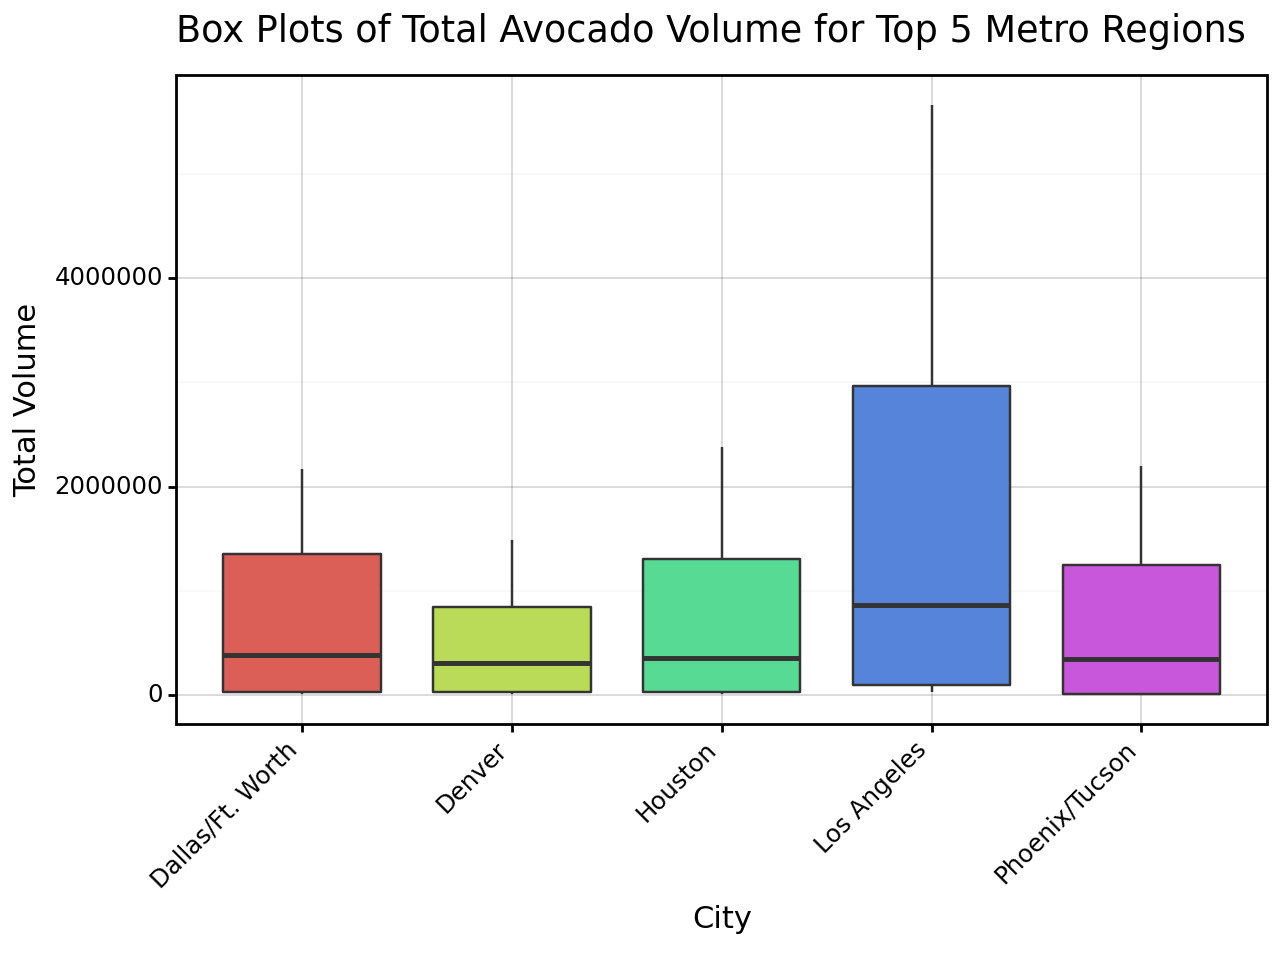

<Figure Size: (640 x 480)>

In [541]:
# Create the box plot for the top 5 cities
(ggplot(top_5_cities_data, aes(x='city', y='total_volume', fill = "city")) +
        geom_boxplot() +
        labs(title="Box Plots of Total Avocado Volume for Top 5 Metro Regions",
             x="City",
             y="Total Volume") +
        theme_linedraw() +
        theme(axis_text_x=element_text(rotation=45, hjust=1), legend_position="none"))

The box plot reveals significant variations in the total volume of avocado sales across the top five metro regions. Los Angeles stands out with both the highest median sales and the greatest variability, indicating that avocado consumption in this city is both higher and more volatile compared to the others. In contrast, Denver consistently has the lowest sales volume, with little variation, suggesting steady but modest demand for avocados. Dallas/Ft. Worth and Houston display moderate sales, but Dallas/Ft. Worth shows more variability, implying fluctuating demand. Phoenix/Tucson also shows relatively low sales with a slightly wider spread than Denver, suggesting a slightly more diverse range of avocado sales. Overall, Los Angeles dominates avocado sales, while Denver lags behind, and the other cities occupy middle ground with moderate but variable demand.

## Pivoting
The following four California geographical regions are in this data set: "Los Angeles", "San Diego", "Sacramento", and "San Francisco".

### 6.  From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [542]:
# Define the California regions
california_regions = ['Los Angeles', 'Sacramento', 'San Diego', 'San Francisco']

# Use .loc to filter the rows where 'city' is in the California regions list
california_avocados = avocado_clean_city.loc[avocado_clean_city['city'].isin(california_regions)]

california_avocados.head()

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,city,plu,total_sold,avo_size,area_type
44,2015-01-04,0.85,2682159.95,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,4046,1837999.65,small_hass,city
45,2015-01-04,1.25,54495.54,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,4046,47721.51,small_hass,city
80,2015-01-04,1.05,430138.88,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,4046,110693.69,small_hass,city
81,2015-01-04,1.33,9213.49,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,4046,3727.52,small_hass,city
82,2015-01-04,0.94,461607.33,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,4046,244152.26,small_hass,city


### 7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [543]:
# Group by city and type, then calculate count, sum, and mean of average price
question_7 = (california_avocados.groupby(['city', 'type'])
                .agg(count=('average_price', 'size'),
                     sum_avg_price=('average_price', 'sum'))
                .reset_index())

# Calculate mean average price
question_7['mean_avg_price'] = question_7['sum_avg_price'] / question_7['count']

# Calculate the difference in mean average price between types (organic vs conventional) for each city
price_difference = question_7.pivot(index='city', columns='type', values='mean_avg_price')
price_difference['difference'] = price_difference['organic'] - price_difference['conventional']
price_difference = price_difference.reset_index().sort_values(by='difference', ascending=False)

# Display the price difference
price_difference

type,city,conventional,organic,difference
3,San Francisco,1.40,2.12,0.72
2,San Diego,1.11,1.80,0.68
1,Sacramento,1.30,1.87,0.58
0,Los Angeles,1.05,1.57,0.53


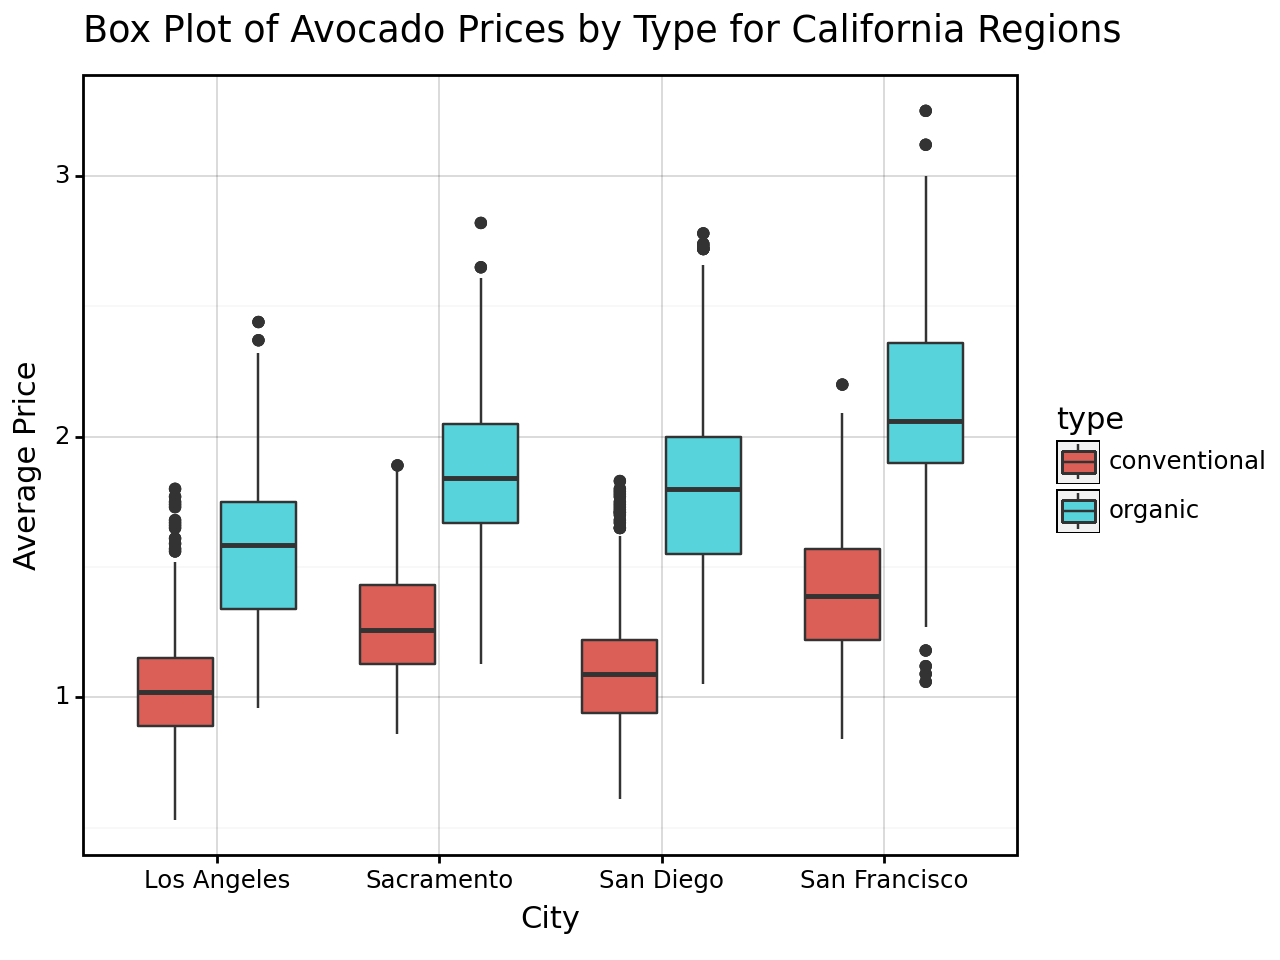

<Figure Size: (640 x 480)>

In [544]:
(ggplot(california_avocados, aes(x='city', y='average_price', fill='type')) +
            geom_boxplot() +
            labs(title="Box Plot of Avocado Prices by Type for California Regions",
                 x="City", y="Average Price") +
            theme_linedraw() +
            theme(legend_position='right'))

The price of conventional versus organic avocados was most different in San Francisco. This was a difference of around 0.72 cents, on average.

### 8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

<img src="avocados.png"
       width = 700
       height = 700>

In [545]:
california_avocados["avo_size"].value_counts()

avo_size
small_hass     2448
large_hass     2448
xlarge_hass    2448
Name: count, dtype: int64

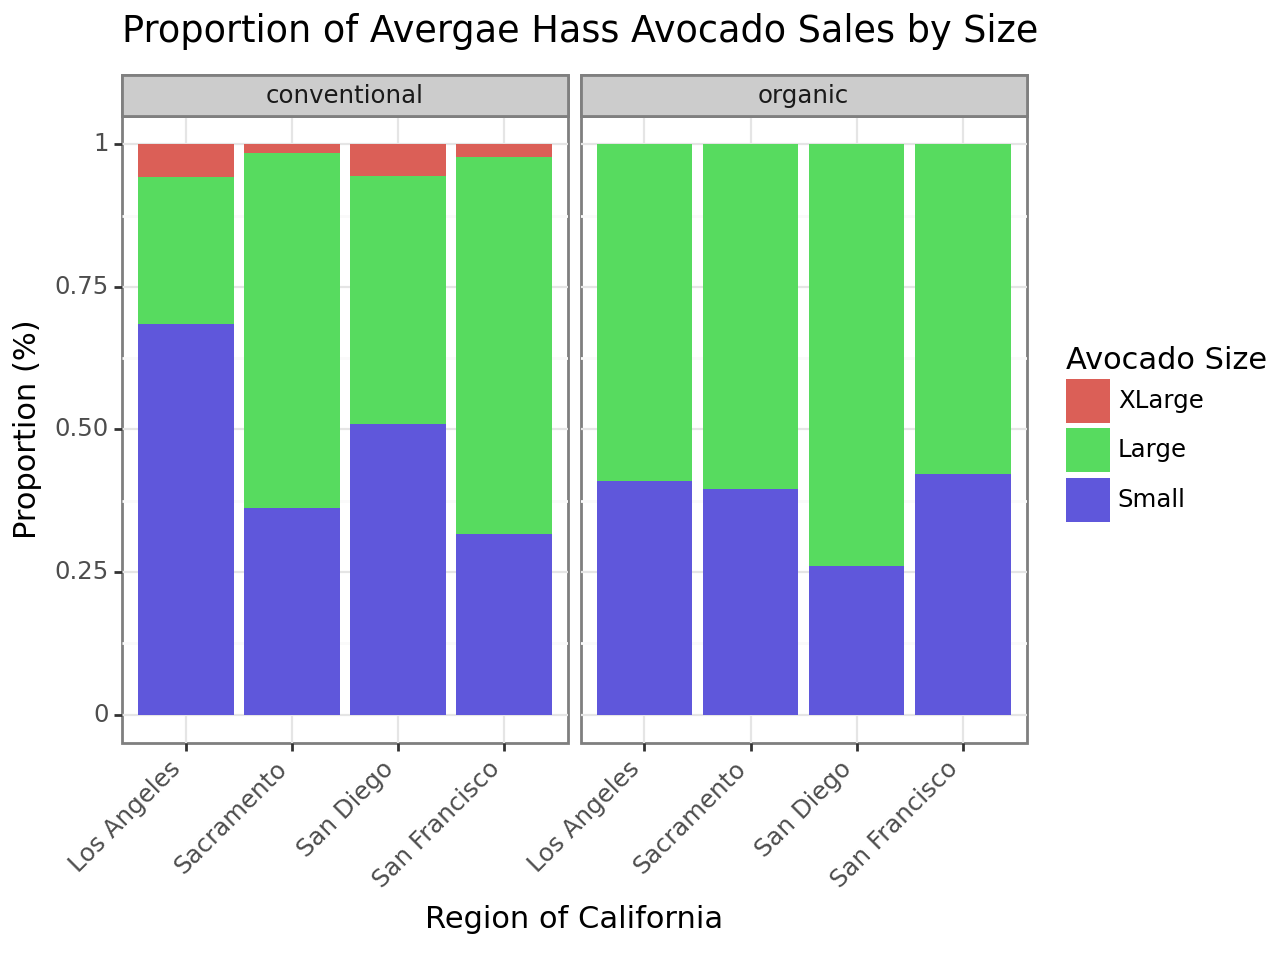

<Figure Size: (640 x 480)>

In [546]:
# Reorder 'avo_size' with Extra Large on top, followed by Large and Small
california_avocados['avo_size'] = pd.Categorical(
    california_avocados['avo_size'], 
    categories=['xlarge_hass', 'large_hass', 'small_hass'], 
    ordered=True
)

# Create the plot with reordered avo_size
(ggplot(california_avocados, aes(x='city', y='total_sold', fill='avo_size')) +
        geom_col(position='fill') +  # This will stack the bars proportionally
        facet_wrap('~type')  +
        scale_fill_discrete(labels=["XLarge", "Large", "Small"])+
        labs(x='Region of California', y='Proportion (%)', fill='Avocado Size') +
        ggtitle('Proportion of Avergae Hass Avocado Sales by Size') +
        theme_bw() +
        theme(axis_text_x=element_text(rotation=45, hjust=1)))


Housing Data can be found here: https://www.kaggle.com/datasets/paultimothymooney/zillow-house-price-data

### Using Outside Data
A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.

Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.

In [547]:
housing_data = pd.read_csv("Data/Sale_Prices_City.csv")

# Drop the first column
housing_data = housing_data.drop(housing_data.columns[[0,1,3,4]], axis=1)

# Rename the column "RegionName" to "region"
housing_data.rename(columns={"RegionName": "city"}, inplace=True)

# Filter the data to only include specific regions
california_housing = housing_data[housing_data['city'].isin(["Los Angeles", "Sacramento", "San Diego", "San Francisco"])]

# Pivot the data from wide to long format
california_housing_long = california_housing.melt(
    id_vars=["city"], 
    var_name="year_month", 
    value_name="HousePrice", 
    col_level=None
)

# Separate the 'year_month' into 'year' and 'month'
california_housing_long[['year', 'month']] = california_housing_long['year_month'].str.split('-', expand=True)

# Drop the original 'year_month' column as it's no longer needed
california_housing_long.drop(columns=['year_month'], inplace=True)


In [548]:
california_housing_long.head()

,city,HousePrice,year,month
0,Los Angeles,507600.00,2008,03
1,San Diego,416600.00,2008,03
2,San Francisco,802500.00,2008,03
3,Sacramento,207200.00,2008,03
4,Los Angeles,489600.00,2008,04


In [549]:
# Create a copy of the DataFrame to avoid the warning
california_avocados_02 = california_avocados.copy()

# Convert 'date' column to datetime format
california_avocados_02['date'] = pd.to_datetime(california_avocados_02['date'])
california_avocados_02['year'] = california_avocados_02['date'].dt.year
california_avocados_02['month'] = california_avocados_02['date'].dt.month
california_avocados_02.head()

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,city,plu,total_sold,avo_size,area_type,month
44,2015-01-04,0.85,2682159.95,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,4046,1837999.65,small_hass,city,1
45,2015-01-04,1.25,54495.54,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,4046,47721.51,small_hass,city,1
80,2015-01-04,1.05,430138.88,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,4046,110693.69,small_hass,city,1
81,2015-01-04,1.33,9213.49,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,4046,3727.52,small_hass,city,1
82,2015-01-04,0.94,461607.33,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,4046,244152.26,small_hass,city,1


In [550]:
# Ensure the 'year' column in both datasets is of the same data type, here converting both to integer
california_housing_long['year'] = california_housing_long['year'].astype(int)
california_avocados_02['year'] = california_avocados_02['year'].astype(int)
california_housing_long['month'] = california_housing_long['month'].astype(int)
california_avocados_02['month'] = california_avocados_02['month'].astype(int)

# Merge the two datasets with a full outer join on 'city', 'year', and 'month'
avocado_housing = pd.merge(
    california_housing_long, 
    california_avocados_02, 
    how='inner', 
    on=['city', 'year', 'month']  # Joining on 'city', 'year', and 'month'
)

# Take a look at the merged dataset
avocado_housing.head()

,city,HousePrice,year,month,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,plu,total_sold,avo_size,area_type
0,Los Angeles,474100.00,2015,1,2015-01-04,0.85,2682159.95,255504.05,215571.80,36981.72,2950.53,conventional,4046,1837999.65,small_hass,city
1,Los Angeles,474100.00,2015,1,2015-01-04,1.25,54495.54,5050.63,5050.63,0.00,0.00,organic,4046,47721.51,small_hass,city
2,Los Angeles,474100.00,2015,1,2015-01-11,0.85,2713699.60,251246.65,222971.68,25111.74,3163.23,conventional,4046,1786326.65,small_hass,city
3,Los Angeles,474100.00,2015,1,2015-01-11,1.08,60232.63,6081.88,6081.88,0.00,0.00,organic,4046,52087.31,small_hass,city
4,Los Angeles,474100.00,2015,1,2015-01-18,0.89,2800679.50,290195.16,260857.96,26671.18,2666.02,conventional,4046,1925013.31,small_hass,city


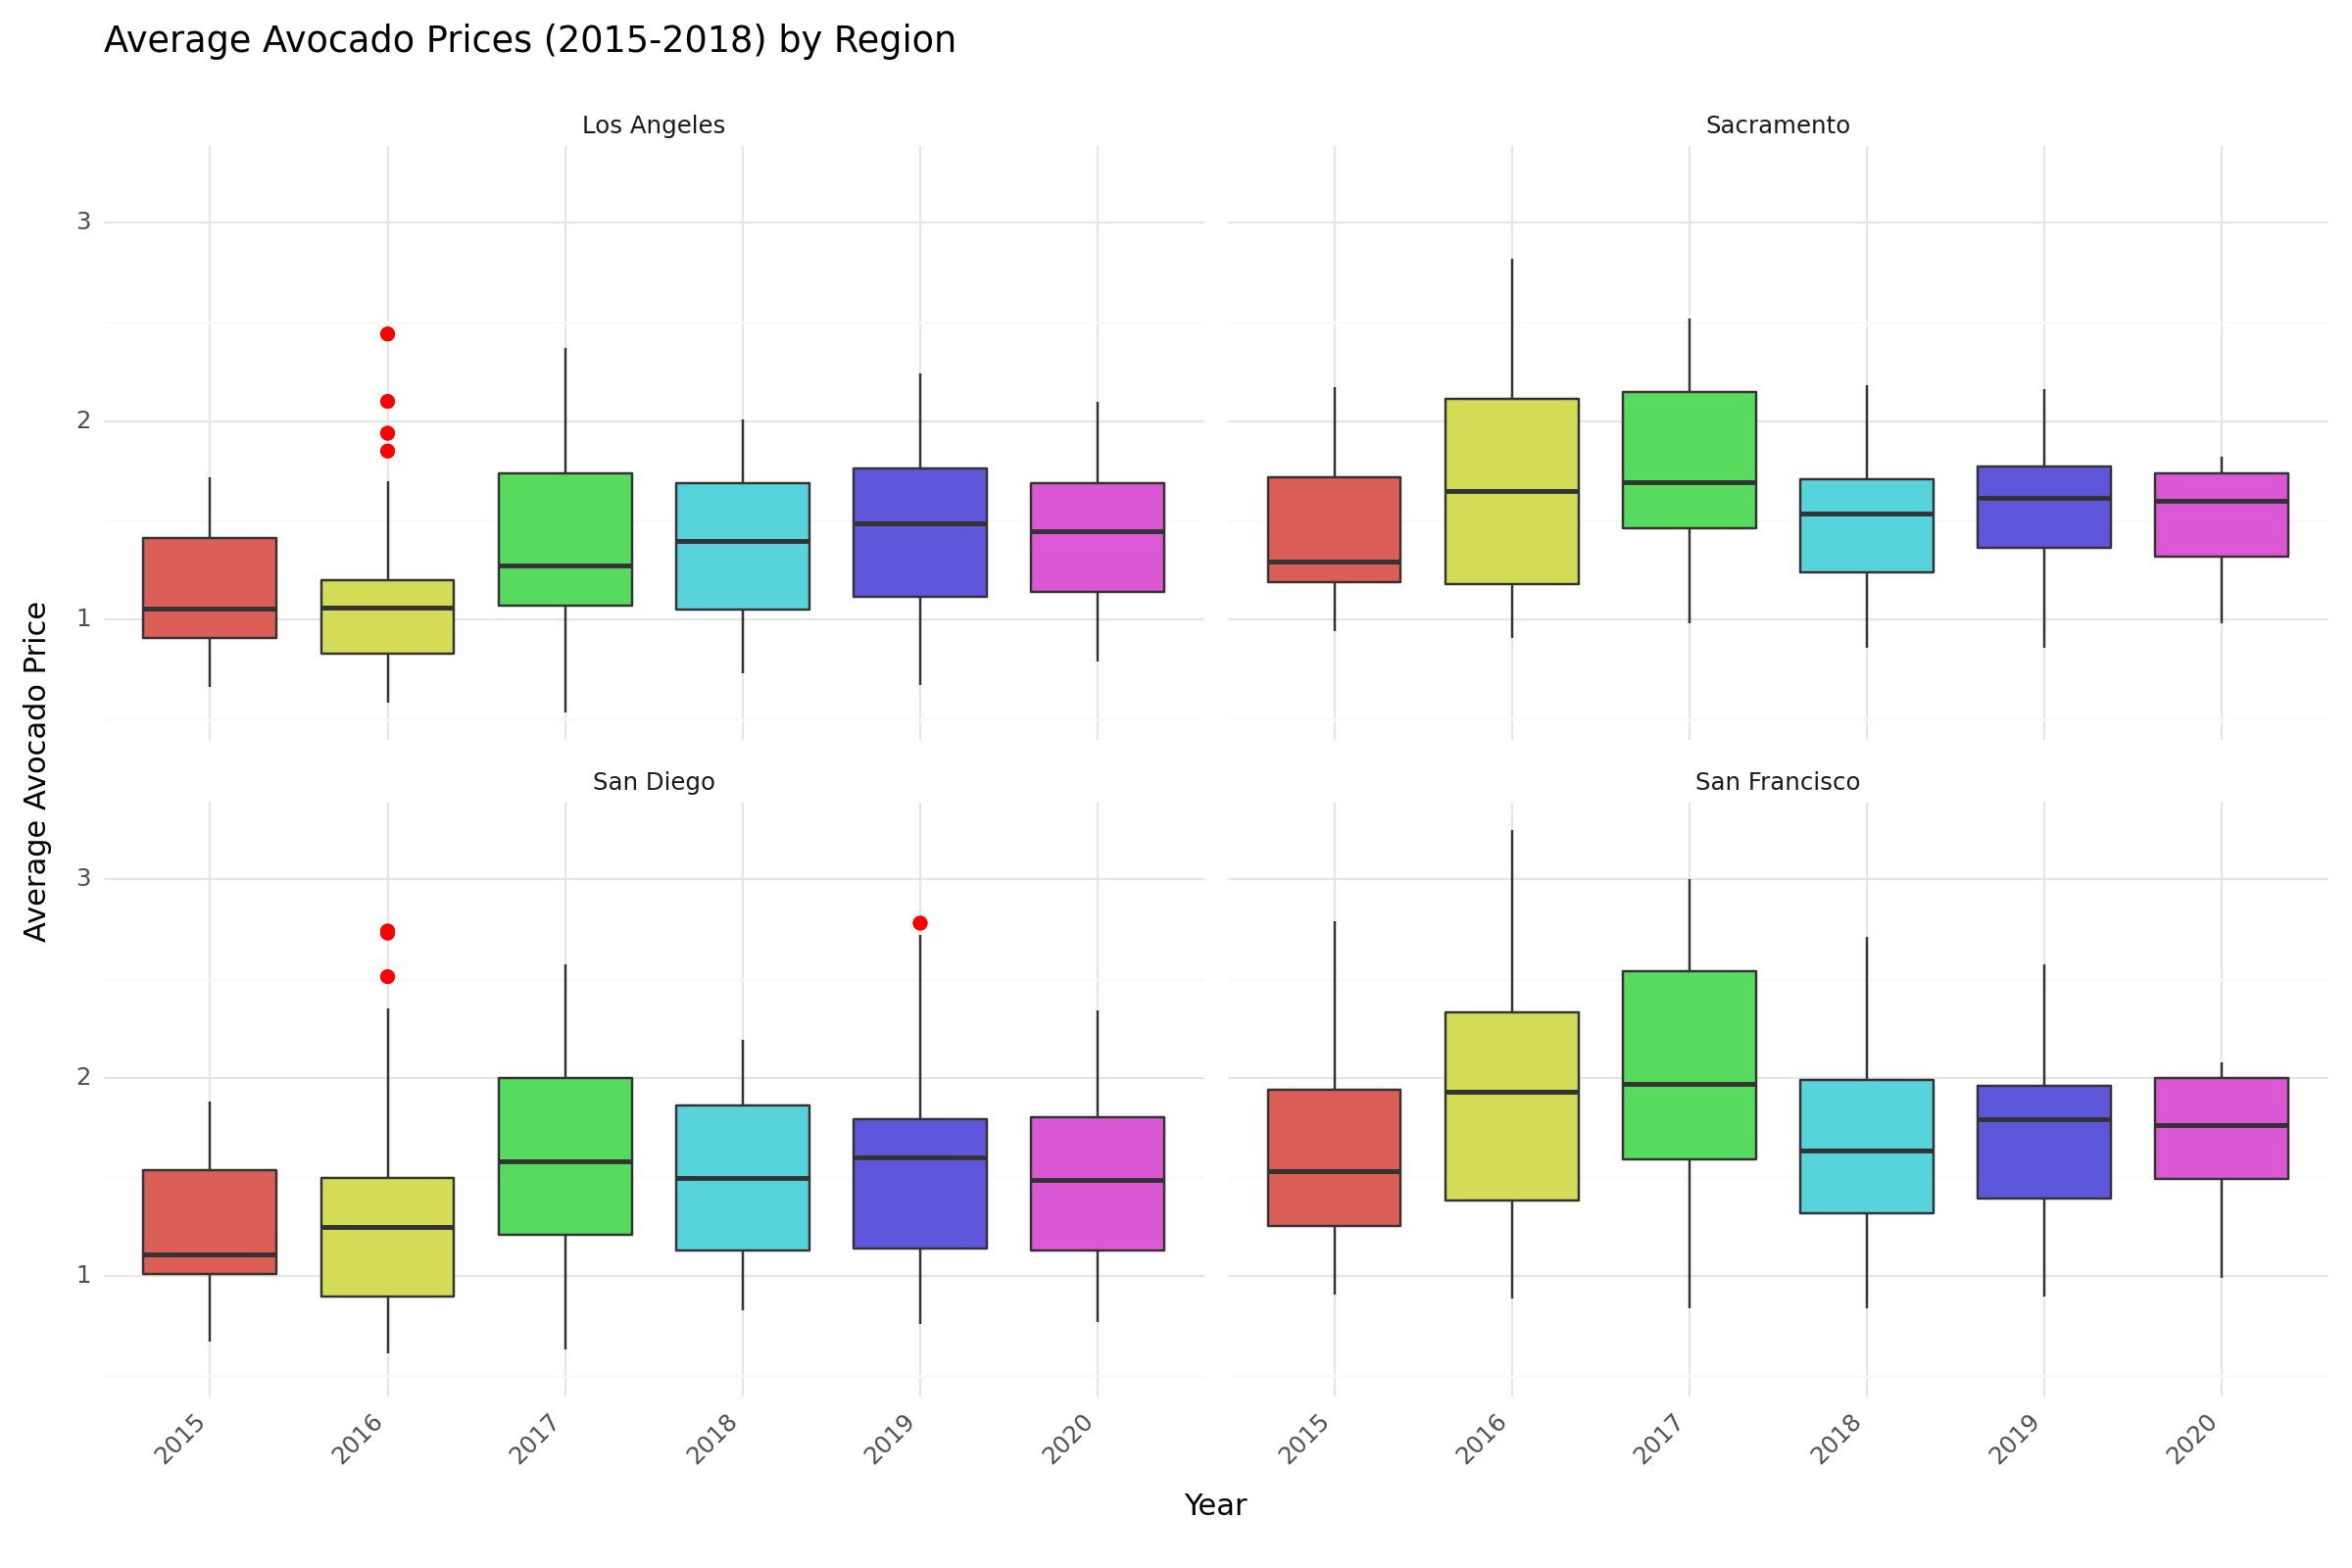

<Figure Size: (1200 x 800)>

In [551]:
# Boxplot of average_price faceted by region
(
    ggplot(avocado_housing, aes(x='factor(year)', y='average_price', fill='factor(year)')) +
    geom_boxplot(outlier_color='red', outlier_size=2) +  # Outliers visible
    facet_wrap('~city', ncol=2) +  # Facet by city
    theme_minimal() +
    theme(
        figure_size=(12, 8),  # Increase figure size for better readability
        axis_text_x=element_text(rotation=45, hjust=1),  # Rotate x-axis labels
        subplots_adjust={'wspace': 0.2}  # Add space between subplots
    ) +
    guides(fill=False) +  # Remove the legend for 'fill'
    labs(
        x='Year', 
        y='Average Avocado Price', 
        title='Average Avocado Prices (2015-2018) by Region'
    )
)

This boxplot shows that avocado prices in San Francisco and Los Angeles are consistently higher and more variable compared to Sacramento and San Diego between 2015 and 2020. San Francisco exhibits the most price fluctuations, especially in 2016 and 2017, while Sacramento and San Diego show more stable and consistent pricing over the years. Outliers are more frequent in San Diego, particularly in 2016. After 2018, avocado prices appear to stabilize or slightly decline across all cities, with 2019 and 2020 showing tighter price ranges.

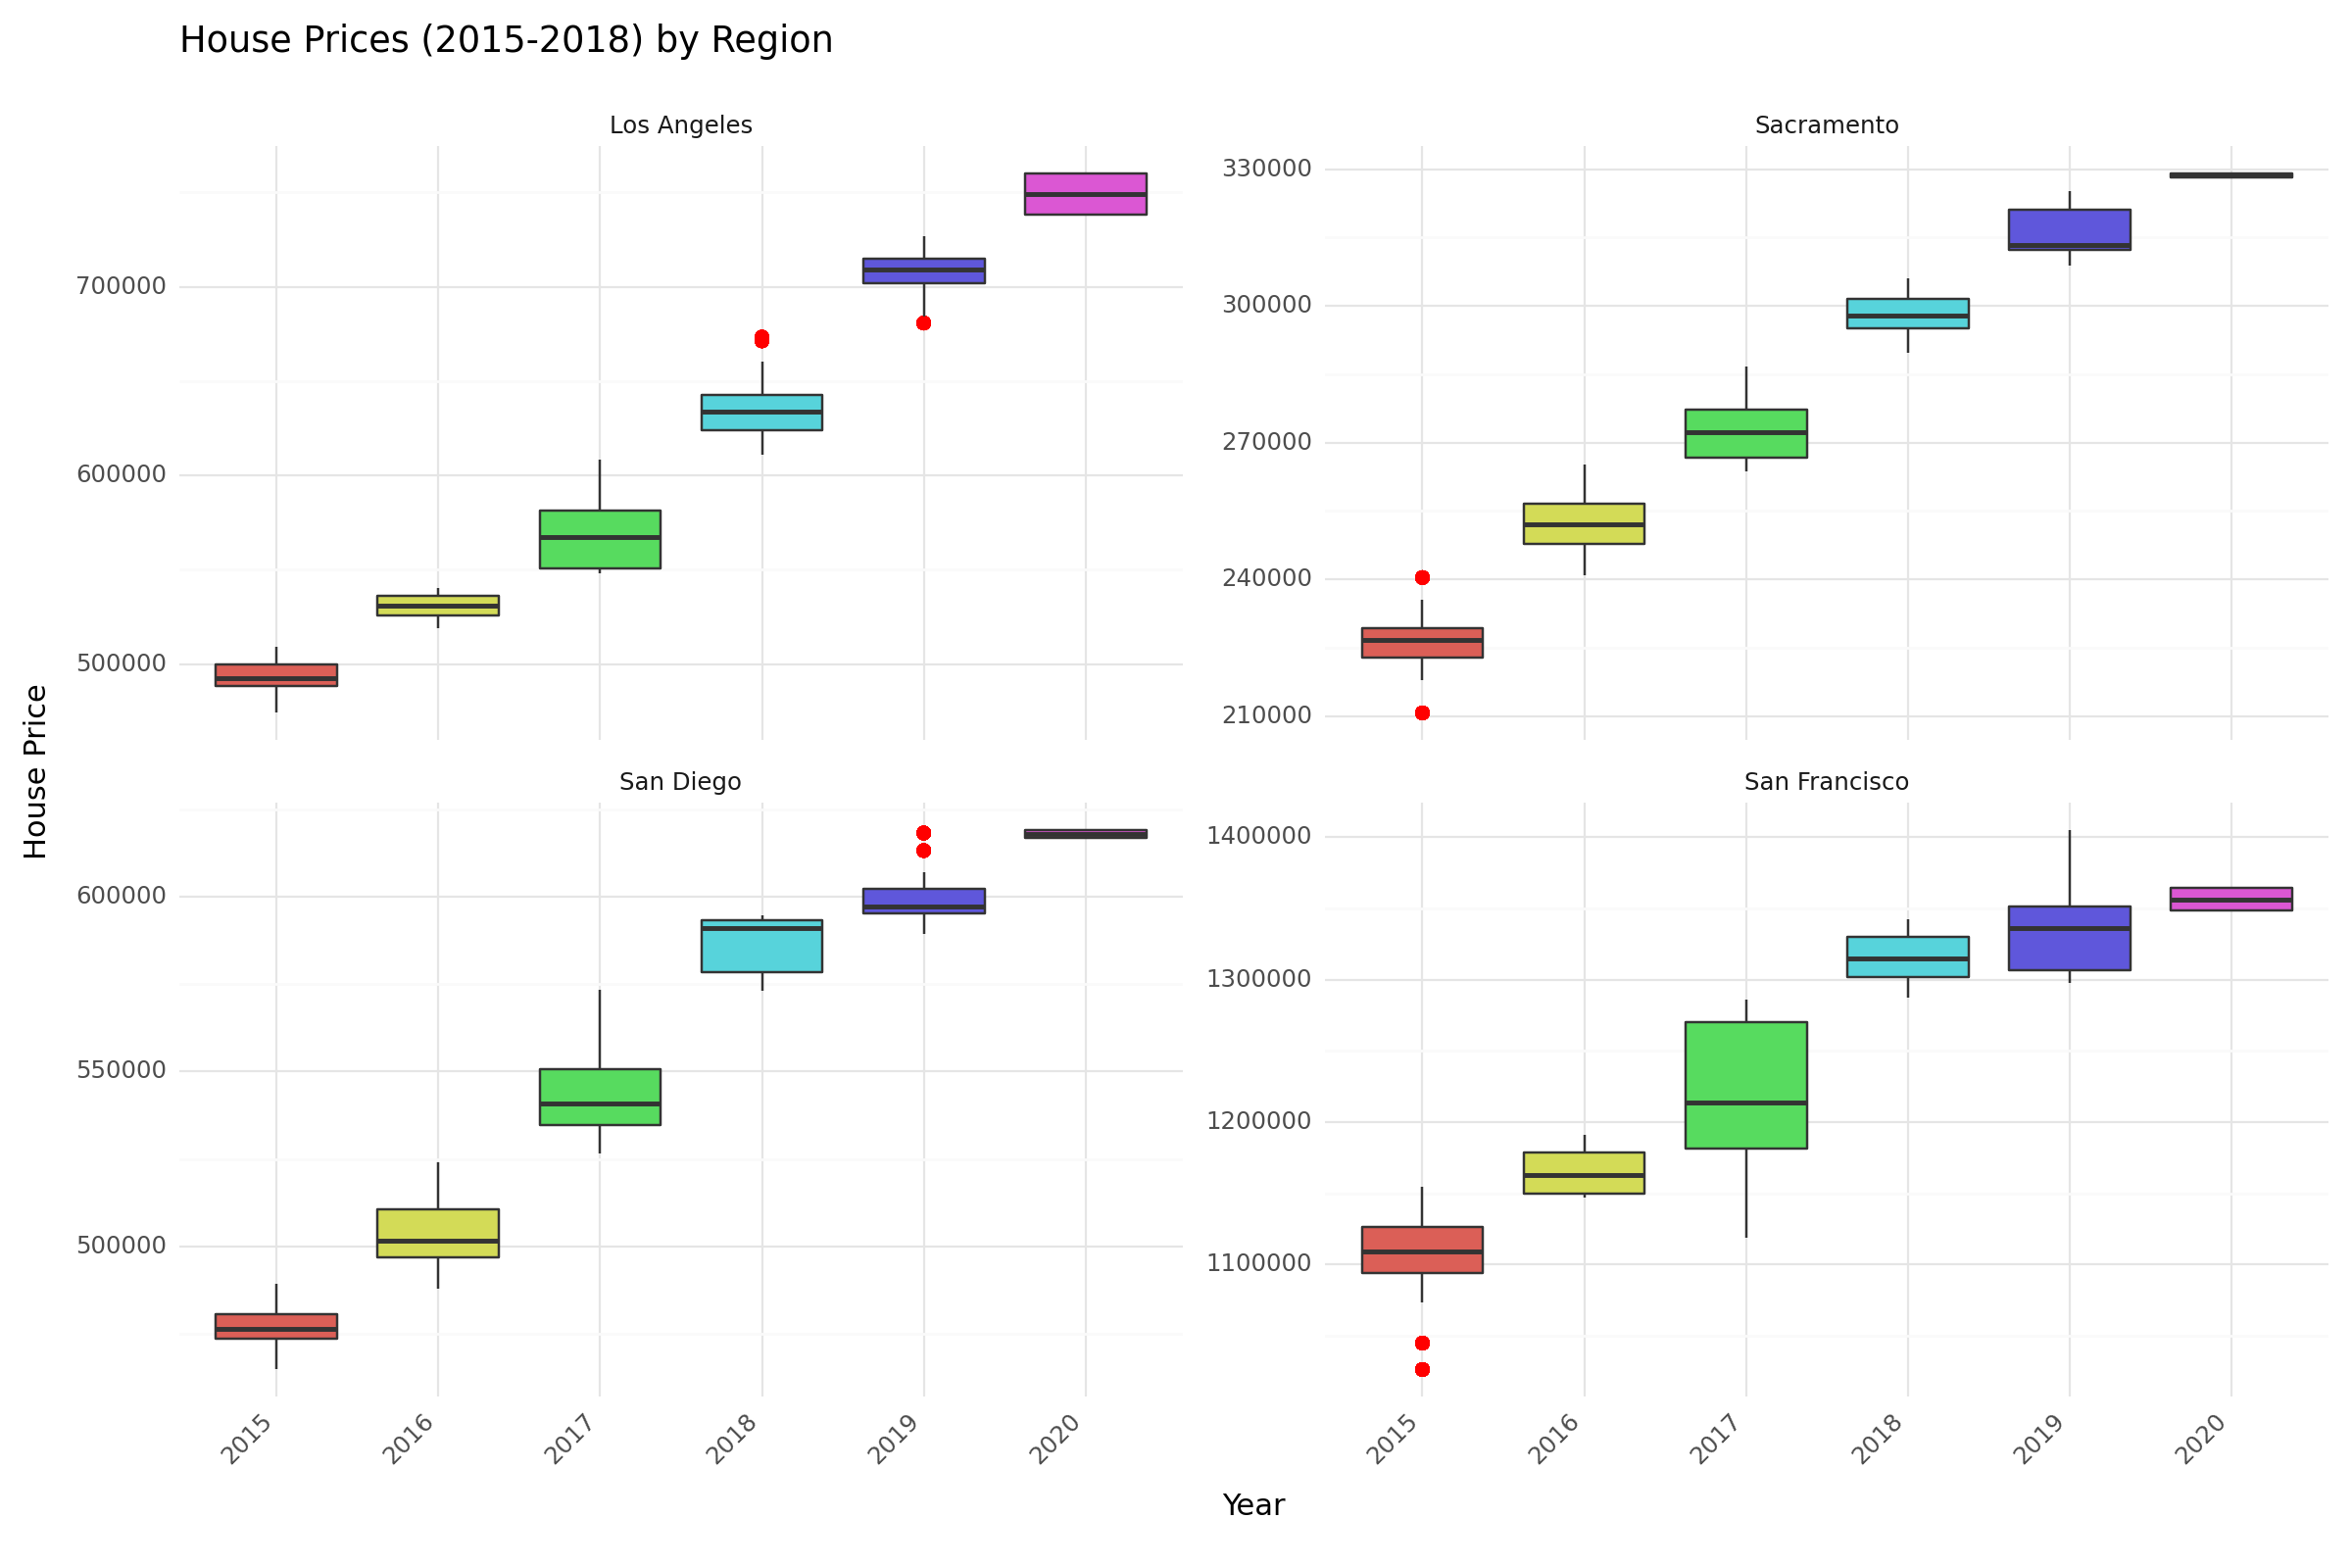

<Figure Size: (1200 x 800)>

In [552]:
# Boxplot of HousePrice faceted by region
(
    ggplot(avocado_housing, aes(x='factor(year)', y='HousePrice', fill='factor(year)')) +
    geom_boxplot(outlier_color='red', outlier_size=2) +  # Outliers visible
    facet_wrap('~city', ncol=2, scales="free_y") +  # Facet by city
    theme_minimal() +
    theme(
        figure_size=(12, 8),  # Increase figure size for better readability
        axis_text_x=element_text(rotation=45, hjust=1),  # Rotate x-axis labels
        subplots_adjust={'wspace': 0.2}  # Add space between subplots
    ) +
    guides(fill=False) +  # Remove the legend for 'fill'
    labs(
        x='Year', 
        y='House Price', 
        title='House Prices (2015-2018) by Region'
    )
)

This boxplot compares house prices across Los Angeles, Sacramento, San Diego, and San Francisco from 2015 to 2020. Several key trends are apparent. In all cities, house prices increase over time, with noticeable jumps between 2016 and 2018. San Francisco remains the most expensive housing market, with its prices significantly higher than those in Sacramento and San Diego. San Francisco also shows a sharp rise between 2016 and 2017, with a large variation in prices during this period. Sacramento, while starting from a lower base, shows steady growth, with house prices gradually rising over the years. Los Angeles and San Diego show similar patterns, with relatively smaller increases but still significant growth, especially after 2017.

Outliers, shown as red dots, are present in some years, particularly in 2015 and 2016 in San Francisco and San Diego, indicating that some houses sold for prices much higher than the median during those years. Overall, the graph highlights consistent upward trends in house prices across all four cities, with San Francisco continuing to lead in terms of price levels and variability.

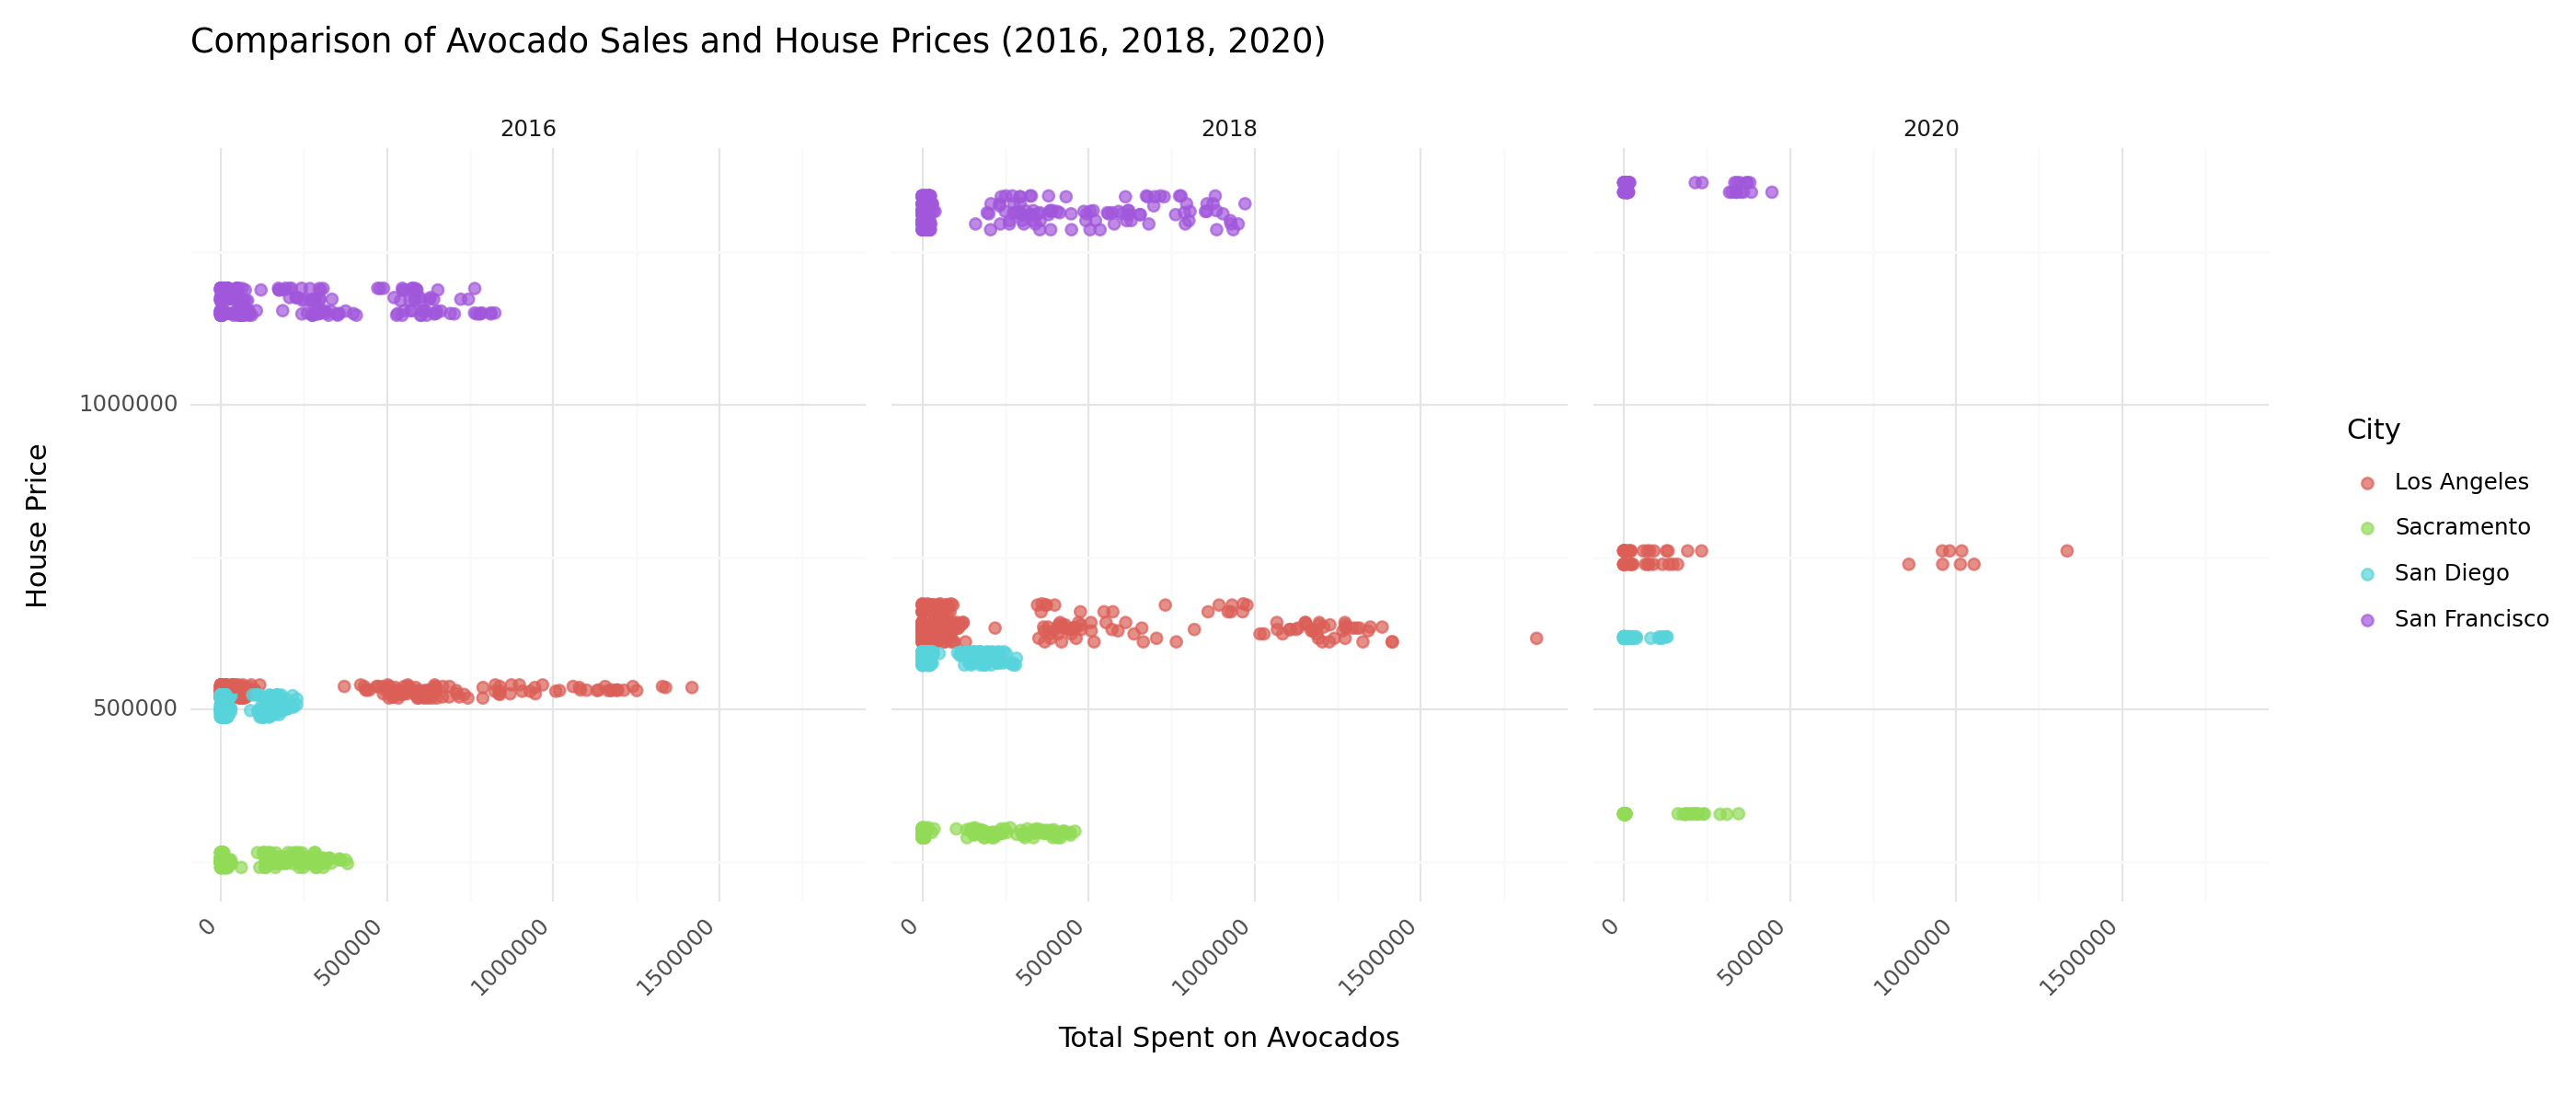

<Figure Size: (1400 x 600)>

In [553]:
avocado_housing['TotalSpent'] = avocado_housing['average_price'] * avocado_housing['total_sold']

# Filter data for the years 2016, 2018, and 2020
filtered_data_years = avocado_housing[avocado_housing['year'].isin([2016, 2018, 2020])]

# Scatter plot of Avocado Sales (AveragePrice) vs House Prices for the selected years, colored by city
(
    ggplot(filtered_data_years, aes(x='TotalSpent', y='HousePrice')) +
    geom_point(aes(color='city'), alpha=0.7, size=2) +  # Scatter points colored by city
    facet_wrap('~year') +  # Facet by year
    theme_minimal() +
    theme(
        figure_size=(14, 6),  # Adjust figure size to fit all plots side by side
        axis_text_x=element_text(rotation=45, hjust=1)  # Rotate x-axis labels
    ) +
    labs(
        x='Total Spent on Avocados',
        y='House Price',
        title='Comparison of Avocado Sales and House Prices (2016, 2018, 2020)',
        color='City'
    )
)

This scatter plot compares avocado prices (x-axis) to house prices (y-axis) across four cities—Los Angeles, Sacramento, San Diego, and San Francisco—for the years 2016, 2018, and 2020. Each city is represented by different colors, with red representing Los Angeles, green for Sacramento, blue for San Diego, and purple for San Francisco.

One clear observation is that most of the data points come from Los Angeles, particularly in 2018 and 2020. This suggests that avocado sales and house price data were more abundant or better recorded for Los Angeles during these years compared to the other cities. Meanwhile, San Francisco (purple points) consistently shows higher house prices, especially in 2016 and 2018, where house prices exceed $1 million. This pattern reaffirms that San Francisco remains the most expensive housing market compared to Sacramento and San Diego.

In terms of price clusters, cities like Sacramento (green) and San Diego (blue) show house prices clustered around lower ranges, particularly below $500,000. This suggests a more affordable housing market compared to Los Angeles and San Francisco. In Sacramento, avocado prices seem to remain stable across different house price ranges, with little fluctuation in either variable.

Lastly, the lack of a clear trend or strong correlation between avocado prices and house prices is evident across all years and cities. The points are widely scattered, indicating that rising house prices, particularly in Los Angeles and San Francisco, do not appear to be driven by avocado prices. Overall, the scatter plot reinforces the notion that avocado prices have little to no relationship with the dramatic changes in the housing market.

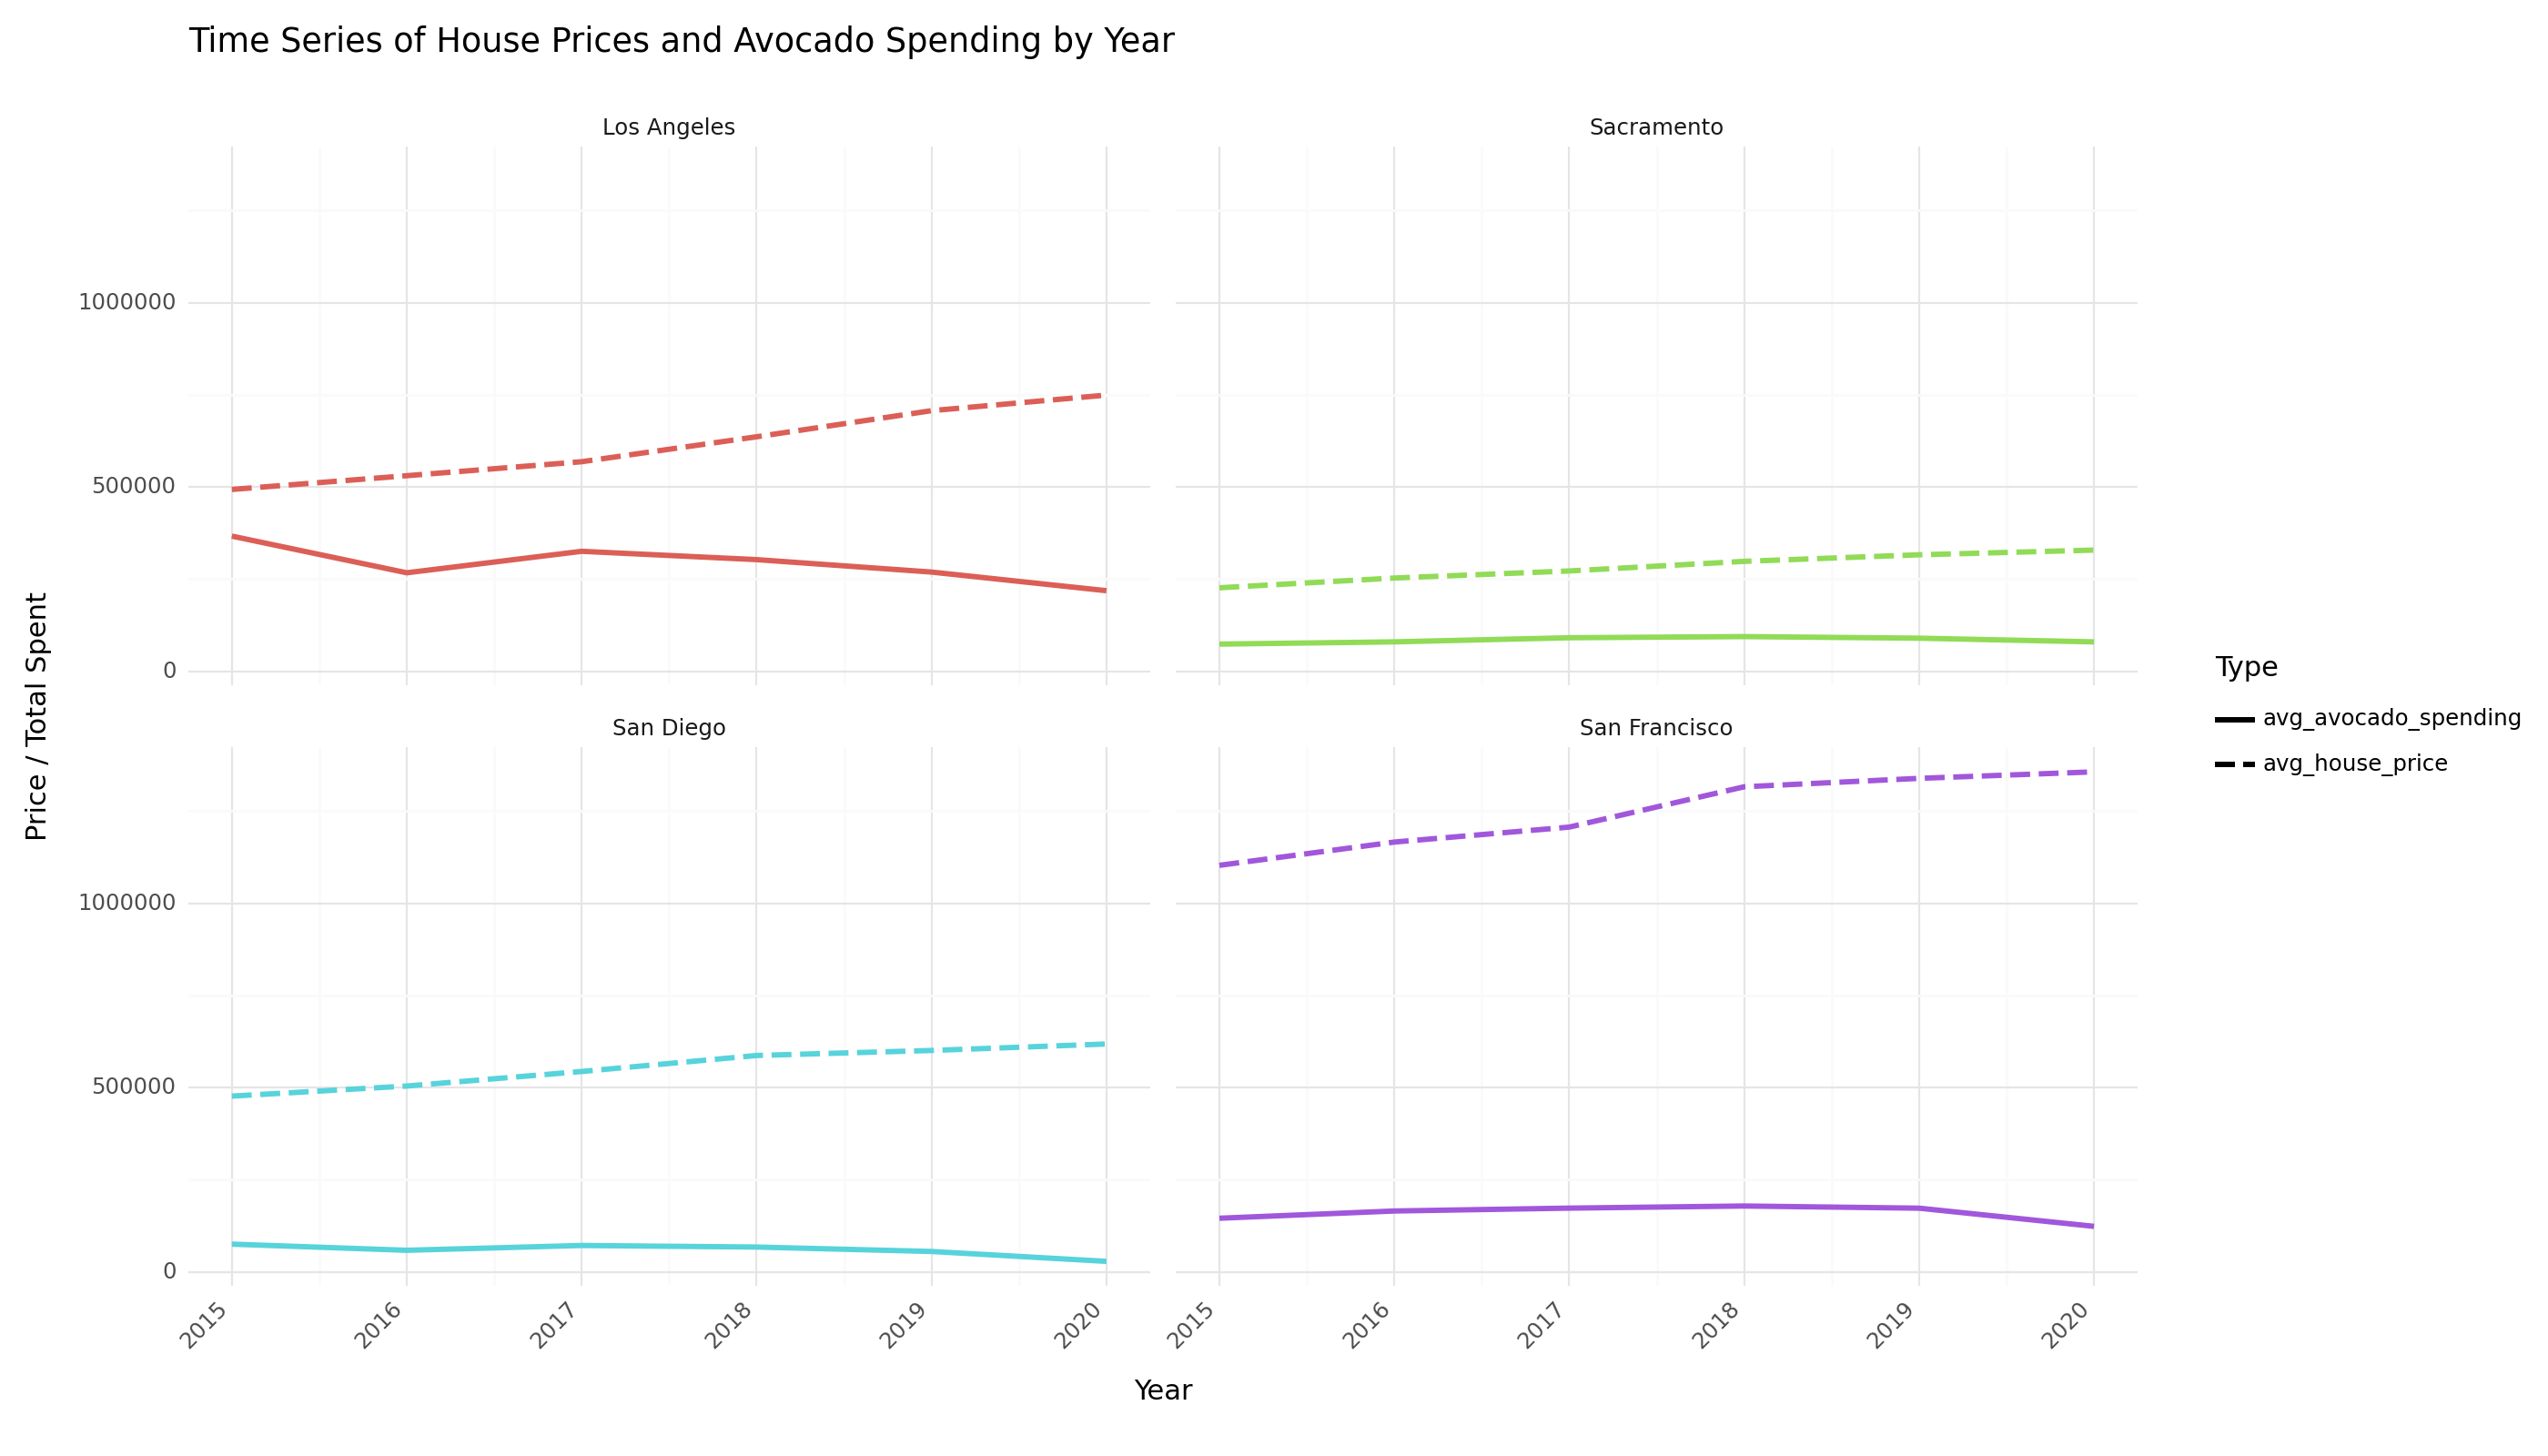

<Figure Size: (1400 x 800)>

In [559]:
# Group the data by year and city, calculating the mean house price and total avocado spending
time_series_data = avocado_housing.groupby(['year', 'city']).agg(
    avg_house_price=('HousePrice', 'mean'),
    avg_avocado_spending=('TotalSpent', 'mean')
).reset_index()

# Reshape the data to make it easier to plot both lines with different linetypes
time_series_long = pd.melt(time_series_data, id_vars=['year', 'city'], 
                           value_vars=['avg_house_price', 'avg_avocado_spending'], 
                           var_name='PriceType', value_name='Value')

# Map linetype to 'PriceType' (HousePrice vs Avocado Spending) and color to 'city'
(
    ggplot(time_series_long, aes(x='year', y='Value', color='city', linetype='PriceType')) +
    geom_line(size=1.2) +  # Line for both house price and avocado spending
    facet_wrap('~city') +  # Facet by city
    theme_minimal() +
    theme(
        figure_size=(14, 8),  # Larger plot size
        axis_text_x=element_text(rotation=45, hjust=1)
    ) +
    guides(color=False) +
    labs(
        x='Year',
        y='Price / Total Spent',
        title='Time Series of House Prices and Avocado Spending by Year',
        linetype='Type'  # Title for the linetype legend
    )
)

This graph compares the average house prices (solid lines) and average avocado spending (dashed lines) across four major California cities: Los Angeles, Sacramento, San Diego, and San Francisco, from 2015 to 2020. A few key trends stand out. Across all cities, house prices have generally trended upward, particularly in Los Angeles and San Francisco, where the increase is more pronounced. San Francisco has the highest average house prices, followed closely by Los Angeles. Meanwhile, Sacramento and San Diego show relatively slower growth in house prices, though they both demonstrate a consistent upward trend. 

In contrast, avocado spending, while fluctuating slightly, does not show any strong upward or downward trends in most cities. The dashed lines indicate that avocado spending has remained relatively stable across the years, with some minor variations. This suggests that while house prices have been steadily rising, avocado spending has not kept pace, further supporting the notion that avocado purchases are not significantly affecting house affordability during this time period. Additionally, cities like San Francisco and Los Angeles, despite higher house prices, show very similar patterns of avocado spending to lower-priced regions like Sacramento and San Diego. This indicates that avocado spending might not be regionally dependent within California, unlike housing costs.

Based on the data in this graph, the claim that millennials are spending too much on avocados to afford housing does not hold up. The chart clearly shows a significant rise in house prices across all four major California cities from 2015 to 2020, particularly in San Francisco and Los Angeles, where house prices are much higher compared to Sacramento and San Diego. On the other hand, avocado spending, represented by the dashed lines, remains relatively stable throughout the years, with no drastic increases or decreases.

The stable avocado spending compared to the rapid increase in housing costs suggests that the cost of avocados is not a significant factor in housing affordability. The disparity between the trends indicates that rising house prices are driven by broader economic factors, such as supply and demand, rather than lifestyle choices like avocado consumption. Therefore, it is unlikely that millennials' spending on avocados is preventing them from affording homes.